In [3]:
import sqlite3 as sql

In [4]:
# create db
conn = sql.connect('elections.db')

In [5]:
# Select all from database
query = "SELECT * FROM elections"
cur = conn.execute(query)
rows = cur.fetchall()
print(rows[0:4])

[(0, 'W07000049', 'Lab hold', 'Lab', 'Con', 50750, 31598, 82, 10490, 6518, 17008, 1072, 3108, 450, 0, 2711, 0, 0, 0, 0, 0, 731, 0), (1, 'W07000058', 'Con hold', 'Con', 'Lab', 44699, 31865, 123, 2034, 14687, 12653, 1821, 0, 0, 0, 2704, 0, 0, 0, 0, 0, 0, 0), (2, 'S14000001', 'SNP hold', 'SNP', 'Con', 62489, 37413, 72, 12670, 7535, 4939, 2846, 1008, 880, 20205, 0, 0, 0, 0, 0, 0, 0, 0), (3, 'S14000002', 'SNP gain from Con', 'SNP', 'Con', 65719, 45638, 131, 3990, 16398, 3834, 5018, 0, 0, 20388, 0, 0, 0, 0, 0, 0, 0, 0)]


In [6]:
query = """
    SELECT first_party 
    FROM elections
"""
cur = conn.execute(query)
rows = cur.fetchall()
print(rows[0:4])

[('Lab',), ('Con',), ('SNP',), ('SNP',)]


In [7]:
query = """
    SELECT DISTINCT first_party 
    FROM elections
"""
cur = conn.execute(query)
rows = cur.fetchall()
partiesdb = rows
partiesdb


[('Lab',),
 ('Con',),
 ('SNP',),
 ('PC',),
 ('LD',),
 ('DUP',),
 ('SF',),
 ('SDLP',),
 ('Green',),
 ('Spk',),
 ('Alliance',)]

In [8]:
query = """
    SELECT first_party 
    FROM elections
    WHERE first_party == 'Lab'
"""
cur = conn.execute(query)
rows = cur.fetchall()
labWinsdb=len(rows)
labWinsdb

202

In [9]:
partyWinsdb = []
for i in partiesdb:
    query = f"""
        SELECT * 
        FROM elections
        WHERE first_party = '{i[0]}'
    """
    cur = conn.execute(query)
    rows = cur.fetchall()
    partyWinsdb.append(len(rows))

print(partiesdb)
partyWinsdb
    

[('Lab',), ('Con',), ('SNP',), ('PC',), ('LD',), ('DUP',), ('SF',), ('SDLP',), ('Green',), ('Spk',), ('Alliance',)]


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [10]:
def getWins(i):
    query = f"""
        SELECT * 
        FROM elections
        WHERE first_party = '{i[0]}'
    """
    cur = conn.execute(query)
    rows = cur.fetchall()
    return(len(rows))

partyWinsdb = [ getWins(i) for i in partiesdb]
    

print(partiesdb)
partyWinsdb

[('Lab',), ('Con',), ('SNP',), ('PC',), ('LD',), ('DUP',), ('SF',), ('SDLP',), ('Green',), ('Spk',), ('Alliance',)]


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [11]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

<AxesSubplot:title={'center':'Seat allocation per party'}>

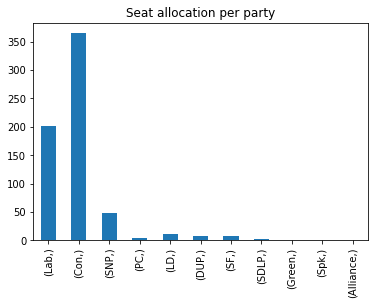

In [14]:
import pandas as pd
dfdb = pd.DataFrame(partyWinsdb,partiesdb)
dfdb.plot.bar(legend=False, title='Seat allocation per party')

In [13]:
conn.close()